In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')
order_items = pd.read_csv('order_items.csv')
payments = pd.read_csv('payments.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv')
user_feedback = pd.read_csv('user_feedback.csv')

In [75]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,Days_Req_By_Sellers,Days_req_by_carrier,Total_Days_Req,Unnamed: 11,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name
0,e481f51cbd,9ef432eb62,delivered,02-10-2017 10:56,02-10-2017 11:07,04-10-2017 19:55,10-10-2017 21:25,18-10-2017 00:00,3,7,9,NaN,2017,10,October
1,53cdb2fc8b,b0830fb474,delivered,24-07-2018 20:41,26-07-2018 03:24,26-07-2018 14:31,07-08-2018 15:27,13-08-2018 00:00,1,13,13,NaN,2018,7,July
2,47770eb910,41ce2a54c0,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,17-08-2018 18:06,04-09-2018 00:00,1,10,10,NaN,2018,8,August
3,949d5b44db,f88197465e,delivered,18-11-2017 19:28,18-11-2017 19:45,22-11-2017 13:39,02-12-2017 00:28,15-12-2017 00:00,4,10,14,NaN,2017,11,November
4,ad21c59c08,8ab97904e6,delivered,13-02-2018 21:18,13-02-2018 22:20,14-02-2018 19:46,16-02-2018 18:17,26-02-2018 00:00,1,2,3,NaN,2018,2,February


In [76]:
customers.head()

,customer_id,customer_unique_id,customer_state
0,06b8999e2f,861eff4711,SP
1,18955e83d3,290c77bc52,SP
2,4e7b3e0028,060e732b5b,SP
3,b2b6027bc5,259dac7578,SP
4,4f2d8ab171,345ecd01c3,SP


In [77]:
order_items.head()

,order_id,product_id,seller_id,price
0,00010242fe,4.24E+12,48436dade1,58
1,00018f77f2,e5f2d52b80,dd7ddc04e1,239
2,000229ec39,c777355d18,5b51032edd,199
3,00024acbcd,7634da152a,9d7a1d34a5,12
4,00042b26cf,ac6c362306,df560393f3,199


In [78]:
payments.head()

,order_id,payment_type,payment_value
0,b81ef226f3,credit_card,99
1,a9810da829,credit_card,24
2,25e8ea4e93,credit_card,65
3,ba78997921,credit_card,107
4,42fdf880ba,credit_card,128


In [79]:
products.head()

,product_id,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg
0,1e9e8ef04d,1.0,16.0,10.0,14.0,perfumery,0.225
1,3aa071139c,1.0,30.0,18.0,20.0,art,1.000
2,96bd76ec88,1.0,18.0,9.0,15.0,sports_leisure,0.154
3,cef67bcfe1,1.0,26.0,4.0,26.0,baby,0.371
4,9dc1a7de27,4.0,20.0,17.0,13.0,housewares,0.625


In [80]:
sellers.head()

,seller_id,seller_state
0,3442f8959a,SP
1,d1b65fc7de,SP
2,ce3ad9de96,RJ
3,c0f3eea2e1,SP
4,51a04a8a6b,SP


In [81]:
user_feedback.head()

,review_id,order_id,review_score,survey_sent_date,survey_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af871,4,18-01-2018 00:00,18-01-2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c,5,10-03-2018 00:00,11-03-2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b2,5,17-02-2018 00:00,18-02-2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b,5,21-04-2017 00:00,21-04-2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e2,5,01-03-2018 00:00,02-03-2018 10:26


## Merging Orders and Order_item on order_id

In [82]:
order_merge_order_item = pd.merge(orders,order_items,on="order_id",how="right")

In [83]:
order_merge_order_item

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,Days_Req_By_Sellers,Days_req_by_carrier,Total_Days_Req,Unnamed: 11,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,product_id,seller_id,price
0,e481f51cbd,9ef432eb62,delivered,02-10-2017 10:56,02-10-2017 11:07,04-10-2017 19:55,10-10-2017 21:25,18-10-2017 00:00,3,7,9,NaN,2017,10,October,87285b3488,3504c0cb71,29
1,53cdb2fc8b,b0830fb474,delivered,24-07-2018 20:41,26-07-2018 03:24,26-07-2018 14:31,07-08-2018 15:27,13-08-2018 00:00,1,13,13,NaN,2018,7,July,595fac2a38,289cdb325f,118
2,47770eb910,41ce2a54c0,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,17-08-2018 18:06,04-09-2018 00:00,1,10,10,NaN,2018,8,August,aa4383b373,4869f7a5df,159
3,949d5b44db,f88197465e,delivered,18-11-2017 19:28,18-11-2017 19:45,22-11-2017 13:39,02-12-2017 00:28,15-12-2017 00:00,4,10,14,NaN,2017,11,November,d0b61bfb1d,6692290271,45
4,ad21c59c08,8ab97904e6,delivered,13-02-2018 21:18,13-02-2018 22:20,14-02-2018 19:46,16-02-2018 18:17,26-02-2018 00:00,1,2,3,NaN,2018,2,February,65266b2da2,2c9e548be1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112647,63943bddc2,1fca14ff28,delivered,06-02-2018 12:58,06-02-2018 13:10,07-02-2018 23:22,28-02-2018 17:37,02-03-2018 00:00,2,21,23,NaN,2018,2,February,f1d4ce8c6d,1f9ab4708f,174
112648,83c1379a01,1aa71eb042,delivered,27-08-2017 14:46,27-08-2017 15:04,28-08-2017 20:52,21-09-2017 11:24,27-09-2017 00:00,2,24,25,NaN,2017,8,August,b80910977a,d50d79cb34,205
112649,11c177c8e9,b331b74b18,delivered,08-01-2018 21:28,08-01-2018 21:36,12-01-2018 15:35,25-01-2018 23:32,15-02-2018 00:00,4,14,18,NaN,2018,1,January,d1c427060a,a1043bafd4,179
112650,11c177c8e9,b331b74b18,delivered,08-01-2018 21:28,08-01-2018 21:36,12-01-2018 15:35,25-01-2018 23:32,15-02-2018 00:00,4,14,18,NaN,2018,1,January,d1c427060a,a1043bafd4,179


## Merging products and order_merge_order_item on product_id

In [84]:
order_merge_order_item_products = pd.merge(products,order_merge_order_item,on="product_id",how="right")

In [85]:
order_merge_order_item_products

,product_id,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg,order_id,customer_id,order_status,...,order_estimated_delivery_date,Days_Req_By_Sellers,Days_req_by_carrier,Total_Days_Req,Unnamed: 11,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,seller_id,price
0,1e9e8ef04d,1.0,16.0,10.0,14.0,perfumery,0.225,e17e4f88e3,f8a3e963a3,delivered,...,09-05-2018 00:00,1,2,3,NaN,2018,4,April,5670f4db5b,10
1,3aa071139c,1.0,30.0,18.0,20.0,art,1.000,5236307716,03fc97548a,delivered,...,22-02-2018 00:00,6,11,16,NaN,2018,1,January,b561927807,248
2,96bd76ec88,1.0,18.0,9.0,15.0,sports_leisure,0.154,01f66e5876,e41819d1c9,delivered,...,18-07-2018 00:00,1,2,3,NaN,2018,7,July,7b07b3c748,79
3,cef67bcfe1,1.0,26.0,4.0,26.0,baby,0.371,143d00a4f2,322162b5ca,delivered,...,08-08-2018 00:00,1,4,4,NaN,2018,8,August,c510bc1718,112
4,9dc1a7de27,4.0,20.0,17.0,13.0,housewares,0.625,86cafb8794,c11c31965f,delivered,...,26-04-2018 00:00,2,1,3,NaN,2018,4,April,0be8ff43f2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112647,3.28E+13,NaN,NaN,NaN,NaN,NaN,NaN,26bcf00f62,cc8733d8b8,delivered,...,17-11-2017 00:00,13,7,19,NaN,2017,10,October,b6dc74ed30,24
112648,9.74E+07,NaN,NaN,NaN,NaN,NaN,NaN,1c55f7ccb1,8df0a24a37,delivered,...,14-08-2017 00:00,2,6,7,NaN,2017,7,July,cca3071e3e,70
112649,8.89E+13,NaN,NaN,NaN,NaN,NaN,NaN,f5eda0ded7,68f2b37558,delivered,...,05-01-2018 00:00,9,3,11,NaN,2017,12,December,7142540dd4,129
112650,9.12E+59,NaN,NaN,NaN,NaN,NaN,NaN,ea97616a19,e01dd706e0,delivered,...,27-02-2017 00:00,1,8,9,NaN,2017,1,January,6edacfd9f9,66


## Merging customers and order_merge_order_item_products

In [86]:
order_merge_order_item_products_customers = pd.merge(customers,order_merge_order_item_products,on="customer_id",how="right")

In [87]:
order_merge_order_item_products_customers

,customer_id,customer_unique_id,customer_state,product_id,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg,...,order_estimated_delivery_date,Days_Req_By_Sellers,Days_req_by_carrier,Total_Days_Req,Unnamed: 11,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,seller_id,price
0,06b8999e2f,861eff4711,SP,a9516a079e,1.0,54.0,64.0,31.0,office_furniture,8.683,...,05-06-2017 00:00,7,2,9,NaN,2017,5,May,7c67e1448b,124
1,18955e83d3,290c77bc52,SP,4aa6014ece,3.0,89.0,15.0,40.0,housewares,10.150,...,06-02-2018 00:00,3,14,17,NaN,2018,1,January,b8bc237ba3,289
2,4e7b3e0028,060e732b5b,SP,bd07b66896,1.0,52.0,52.0,17.0,office_furniture,8.267,...,13-06-2018 00:00,22,4,26,NaN,2018,5,May,7c67e1448b,139
3,b2b6027bc5,259dac7578,SP,a5647c44af,1.0,56.0,51.0,28.0,office_furniture,12.160,...,10-04-2018 00:00,15,1,15,NaN,2018,3,March,7c67e1448b,149
4,4f2d8ab171,345ecd01c3,SP,9391a573ab,1.0,45.0,15.0,35.0,home_confort,5.200,...,15-08-2018 00:00,2,11,12,NaN,2018,7,July,4a3ca9315b,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112647,17ddf5dd5d,1a29b476fe,SP,ccb4503d9d,2.0,22.0,22.0,23.0,books_general_interest,0.611,...,25-04-2018 00:00,4,3,7,NaN,2018,4,April,527801b552,74
112648,e7b71a9017,d52a67c98b,SP,9ede6b0570,1.0,25.0,24.0,22.0,sports_leisure,1.211,...,20-04-2018 00:00,2,7,8,NaN,2018,4,April,3fd1e727ba,114
112649,5e28dfe12d,e9f50caf99,CE,7a5d2e1e13,1.0,25.0,20.0,18.0,health_beauty,0.870,...,02-05-2018 00:00,1,31,31,NaN,2018,4,April,d9e7e7778b,37
112650,56b18e2166,73c2643a0a,RS,f819f0c84a,1.0,19.0,13.0,14.0,watches_gifts,0.710,...,05-12-2017 00:00,3,11,13,NaN,2017,11,November,4869f7a5df,689


## Merging order_merge_order_item_products_customers and payments

In [88]:
order_merge_order_item_products_customers_payments = pd.merge(payments,order_merge_order_item_products_customers,on="order_id",how="right")

In [89]:
order_merge_order_item_products_customers_payments

,order_id,payment_type,payment_value,customer_id,customer_unique_id,customer_state,product_id,product_photos_count,product_length_cm,product_height_cm,...,order_estimated_delivery_date,Days_Req_By_Sellers,Days_req_by_carrier,Total_Days_Req,Unnamed: 11,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,seller_id,price
0,b81ef226f3,credit_card,99.0,0a8556ac6b,708ab75d2a,MG,af74cc53dc,8.0,17.0,27.0,...,22-05-2018 00:00,7,8,14,NaN,2018,4,April,213b25e6f5,79
1,a9810da829,credit_card,24.0,f2c7fc58a9,a8b9d3a270,SP,a630cc320a,2.0,16.0,6.0,...,16-07-2018 00:00,3,2,4,NaN,2018,6,June,eaf6d55068,17
2,25e8ea4e93,credit_card,65.0,25b14b69de,6f70c0b2f7,SP,2028bf1b01,2.0,20.0,8.0,...,04-01-2018 00:00,2,3,5,NaN,2017,12,December,cc419e0650,56
3,ba78997921,credit_card,107.0,7a5d8efaaa,87695ed086,MG,548e5bfe28,1.0,44.0,2.0,...,04-01-2018 00:00,2,14,15,NaN,2017,12,December,da8622b14e,89
4,42fdf880ba,credit_card,128.0,15fd6fb8f8,4291db0da7,SP,386486367c,1.0,40.0,9.0,...,13-06-2018 00:00,1,11,12,NaN,2018,5,May,cca3071e3e,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117605,b8b6105962,credit_card,369.0,5d719b0d30,b84dc68f02,RJ,e9c1abcc71,7.0,22.0,6.0,...,24-08-2018 00:00,2,13,14,NaN,2018,8,August,679769a98c,349
117606,28bbae6599,boleto,191.0,4c7f868f43,b1f51a4e19,RJ,1cdfaf0cc5,1.0,33.0,7.0,...,29-12-2017 00:00,2,60,62,NaN,2017,12,December,da8622b14e,169
117607,bfbd0f9bde,NaN,NaN,86dc2ffce2,830d5b7aaa,SP,5a6b04657a,1.0,16.0,16.0,...,04-10-2016 00:00,54,2,55,NaN,2016,9,September,ecccfa2bb9,44
117608,bfbd0f9bde,NaN,NaN,86dc2ffce2,830d5b7aaa,SP,5a6b04657a,1.0,16.0,16.0,...,04-10-2016 00:00,54,2,55,NaN,2016,9,September,ecccfa2bb9,44


## Merging order_merge_order_item_products_customers_payments and Sellers

In [90]:
order_merge_order_item_products_customers_payments_seller =  pd.merge(sellers,order_merge_order_item_products_customers_payments,on="seller_id",how="right")

In [91]:
order_merge_order_item_products_customers_payments_seller

,seller_id,seller_state,order_id,payment_type,payment_value,customer_id,customer_unique_id,customer_state,product_id,product_photos_count,...,order_delivered_to_customer_date,order_estimated_delivery_date,Days_Req_By_Sellers,Days_req_by_carrier,Total_Days_Req,Unnamed: 11,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,price
0,3442f8959a,SP,bc8a5de6ab,credit_card,158.0,1554ffe702,af0f26435f,SP,325a06bcce,1.0,...,01-09-2017 16:51,20-09-2017 00:00,1,2,3,NaN,2017,8,August,10
1,3442f8959a,SP,6d953888a9,credit_card,117.0,a973c4e3ad,b452742346,MG,f4621f8ad6,2.0,...,02-06-2017 16:57,30-05-2017 00:00,7,22,29,NaN,2017,5,May,101
2,3442f8959a,SP,4a90af3e85,credit_card,115.0,9d6837f970,f421a2a66b,SP,ffb64e34a3,3.0,...,30-08-2017 16:07,01-09-2017 00:00,8,1,9,NaN,2017,8,August,106
3,d1b65fc7de,SP,83f24bbc4f,credit_card,231.0,d49bac4ac7,51dc561233,RJ,765c417cdc,7.0,...,04-05-2017 13:20,06-06-2017 00:00,1,7,8,NaN,2017,4,April,209
4,d1b65fc7de,SP,4436eb8a73,credit_card,383.0,3ab417ebff,11426ed998,SP,51b10a13b4,7.0,...,21-08-2017 19:17,06-09-2017 00:00,1,4,5,NaN,2017,8,August,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117605,525771517,NaN,4467611bf4,boleto,729.0,2b5292c3f7,abe9bf925c,RS,45bb83550f,1.0,...,09-11-2017 19:24,21-11-2017 00:00,7,8,15,NaN,2017,10,October,687
117606,525771517,NaN,a21218028d,credit_card,729.0,228874050,f475dc24f1,SP,45bb83550f,1.0,...,NaN,22-01-2018 00:00,-43090,0,-43090,NaN,2017,12,December,687
117607,484380594,NaN,43da1954a3,credit_card,1474.0,4433a42a21,8865836804,SP,2676f64fcc,2.0,...,20-08-2018 15:48,20-08-2018 00:00,9,7,16,NaN,2018,8,August,700
117608,484380594,NaN,43da1954a3,credit_card,1474.0,4433a42a21,8865836804,SP,2676f64fcc,2.0,...,20-08-2018 15:48,20-08-2018 00:00,9,7,16,NaN,2018,8,August,700


In [92]:
#order_merge_order_item_products_customers_payments_seller.to_csv("MyData.csv")

## After some doing some modification in Excel Now importing csv file

In [93]:
My_data = pd.read_csv('MyData.csv')

In [94]:
My_data.head()

,Unnamed: 0,seller_id,seller_state,order_id,payment_type,payment_value,customer_id,customer_unique_id,customer_state,product_id,...,Days_Req_By_Sellers,Days_Req_By_Sellers_Positive,Days_req_by_carrier,Days_req_by_carrier_Positive,Total_Days_Req,Total_Days_Req_Positive,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,price
0,0,3442f8959a,SP,bc8a5de6ab,credit_card,158.0,1554ffe702,af0f26435f,SP,325a06bcce,...,1,1,2,2,3,3,2017,8,August,10
1,1,3442f8959a,SP,6d953888a9,credit_card,117.0,a973c4e3ad,b452742346,MG,f4621f8ad6,...,7,7,22,22,29,29,2017,5,May,101
2,2,3442f8959a,SP,4a90af3e85,credit_card,115.0,9d6837f970,f421a2a66b,SP,ffb64e34a3,...,8,8,1,1,9,9,2017,8,August,106
3,3,d1b65fc7de,SP,83f24bbc4f,credit_card,231.0,d49bac4ac7,51dc561233,RJ,765c417cdc,...,1,1,7,7,8,8,2017,4,April,209
4,4,d1b65fc7de,SP,4436eb8a73,credit_card,383.0,3ab417ebff,11426ed998,SP,51b10a13b4,...,1,1,4,4,5,5,2017,8,August,369


In [95]:
My_data.tail()

,Unnamed: 0,seller_id,seller_state,order_id,payment_type,payment_value,customer_id,customer_unique_id,customer_state,product_id,...,Days_Req_By_Sellers,Days_Req_By_Sellers_Positive,Days_req_by_carrier,Days_req_by_carrier_Positive,Total_Days_Req,Total_Days_Req_Positive,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,price
117605,117605,525771517,NaN,4467611bf4,boleto,729.0,2b5292c3f7,abe9bf925c,RS,45bb83550f,...,7,7,8,8,15,15,2017,10,October,687
117606,117606,525771517,NaN,a21218028d,credit_card,729.0,228874050,f475dc24f1,SP,45bb83550f,...,-43090,0,0,0,-43090,0,2017,12,December,687
117607,117607,484380594,NaN,43da1954a3,credit_card,1474.0,4433a42a21,8865836804,SP,2676f64fcc,...,9,9,7,7,16,16,2018,8,August,700
117608,117608,484380594,NaN,43da1954a3,credit_card,1474.0,4433a42a21,8865836804,SP,2676f64fcc,...,9,9,7,7,16,16,2018,8,August,700
117609,117609,6.95E+303,NaN,9b7a838614,credit_card,182.0,61dd7b5fa2,70dad00a4a,SP,66a5ffd104,...,5,5,16,16,21,21,2017,12,December,169


In [96]:
My_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117610 entries, 0 to 117609
Data columns (total 32 columns):
Unnamed: 0                          117610 non-null int64
seller_id                           117610 non-null object
seller_state                        116446 non-null object
order_id                            117610 non-null object
payment_type                        117607 non-null object
payment_value                       117607 non-null float64
customer_id                         117610 non-null object
customer_unique_id                  117610 non-null object
customer_state                      117610 non-null object
product_id                          117610 non-null object
product_photos_count                115578 non-null float64
product_length_cm                   117255 non-null float64
product_height_cm                   117255 non-null float64
product_width_cm                    117255 non-null float64
product_category_name               117275 non-null object


In [98]:
#DF = DF[~(DF['RAF01Time'] < 0)]

In [99]:
My_data = My_data[~(My_data['Days_Req_By_Sellers']<0)]

In [100]:
My_data = My_data[~(My_data['Days_req_by_carrier']<0)]

In [101]:
My_data = My_data[~(My_data['Total_Days_Req']<0)]

In [102]:
#My_data.to_csv("updated1.1.csv")

## After Droping all the negative values from Day_Req_By_Sellers Columns

In [103]:
My_Data = pd.read_csv("updated1.1.csv")

In [104]:
My_Data.head()

,Unnamed: 0,Unnamed: 0.1,seller_id,seller_state,order_id,payment_type,payment_value,customer_id,customer_unique_id,customer_state,...,Days_Req_By_Sellers,Days_req_by_carrier,Total_Days_Req,Year_Of_Purchase,Month_Of_Purchase_Number,Month Name,price,Sellers_Type,Unnamed: 31,Carrier_Type
0,0,0,3442f8959a,SP,bc8a5de6ab,credit_card,158.0,1554ffe702,af0f26435f,SP,...,1,2,3,2017,8,August,10,Good Sellers,NaN,On Time
1,1,1,3442f8959a,SP,6d953888a9,credit_card,117.0,a973c4e3ad,b452742346,MG,...,7,22,29,2017,5,May,101,Good Sellers,NaN,Late
2,2,2,3442f8959a,SP,4a90af3e85,credit_card,115.0,9d6837f970,f421a2a66b,SP,...,8,1,9,2017,8,August,106,Good Sellers,NaN,On Time
3,3,3,d1b65fc7de,SP,83f24bbc4f,credit_card,231.0,d49bac4ac7,51dc561233,RJ,...,1,7,8,2017,4,April,209,Good Sellers,NaN,On Time
4,4,4,d1b65fc7de,SP,4436eb8a73,credit_card,383.0,3ab417ebff,11426ed998,SP,...,1,4,5,2017,8,August,369,Good Sellers,NaN,On Time


Total Days Required to deliver
count    113393.000000
mean         18.306342
std         492.109942
min           1.000000
25%           7.000000
50%          10.000000
75%          16.000000
max       42804.000000
Name: Total_Days_Req, dtype: float64


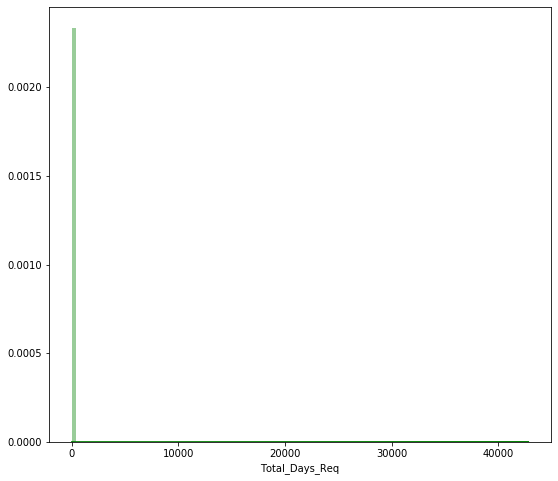

In [105]:
print("Total Days Required to deliver")
print(My_Data['Total_Days_Req'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(My_Data['Total_Days_Req'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    113393.000000
mean        119.596395
std         183.467199
min           0.000000
25%          39.000000
50%          74.000000
75%         133.000000
max        6735.000000
Name: price, dtype: float64


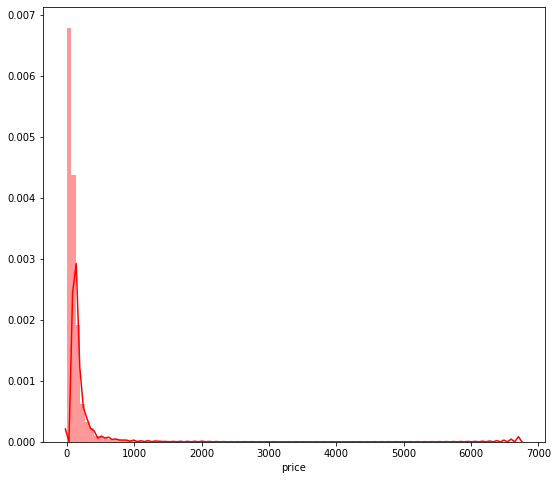

In [106]:
print(My_Data['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(My_Data['price'], color='r', bins=100, hist_kws={'alpha': 0.4});

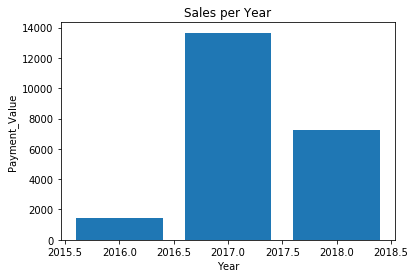

In [107]:
plt.bar(My_Data["Year_Of_Purchase"],My_Data["payment_value"])
plt.title("Sales per Year")
plt.xlabel("Year")
plt.ylabel("Payment_Value")
plt.show()

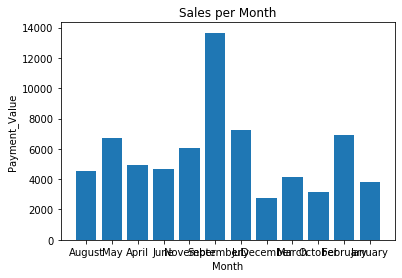

In [108]:
plt.bar(My_Data["Month Name"],My_Data["payment_value"])
plt.title("Sales per Month")
plt.xlabel("Month")
plt.ylabel("Payment_Value")
plt.show()